<center> <h1> <b> Investigating the Impact of Income-Related Factors on COVID-19 Death Rate Across Countries and the Moderating Role of the Prevention Policy Strength </b> </h1> </center>

<h2> Introduction </h2>

    COVID-19 has a huge impact around the world, and countries with weaker economies are always more fragile to the spread of such outbreaks. At the micro level, personal income level has a crucial impact on the resistance to the aggression brought about by the virus. A Cornell University study demonstrated that income level, which often implies comprehensive information on household access to healthcare resources, underlying disease and health status, living and working environments, and prevention and coping ability, is strongly associated with exposure to COVID-19 (Rahman et al., 2023). However, in country-level studies, past researchers tend to overgeneralize incomes as GDP for examining COVID-19 outcomes. Therefore, this research aims to fill this gap by focusing on the specific contribution of income-related factors—such as national income level, income stability, employment vulnerability, and income inequality—to the pandemic's death rate. Moreover, this research also examines the effectiveness of government efforts to combat the virus in mediating this relationship. The goal of this paper is to provide a theoretical reference for governmental prevention policies in countries of all income statuses, helping them optimize their preventive measures and better protect themselves against the virus.
    
    Many articles provide the basis for this study. For example, a 2021 paper shows that the Gini coefficient is significantly associated with higher COVID-19 mortality across all age groups in 22 OECD countries (Sepulveda & Brooker, 2021). Similarly, another study from the same period provided evidence for the effect of income inequality on COVID-19 mortality rates (Tan et al., 2021). Additionally, a team of researchers also tried to study income level on local outbreaks at the level of Korean provincial capitals and found its effect on virus transmission (Kim et al., 2021). In addition, a one-year longitudinal study spanning 44 countries provided the modeling basis for this study to use panel data to examine the COVID-19 pattern (Motallebi et al., 2021).
    
    Just as appropriate support policies can help poor families out of their difficulties, appropriate prevention and control policies of nations can make up for their shortcomings in facing the virus at the economic level. This study seeks to inform feasible and effective public health policies.


<h2> Data Cleaning and Loading </h2>

    Data used are all country-level data provided by the instructor or sourced from the World Bank, Oxford Database, OECD, and the International Labour Organization. The cumulated case fatality rate (CFR) of COVID-19 is the outcome variable representing the death rate of the virus, and variables of interest are the Gini index, unemployment, average wage, and informal employment rate which each represent an aspect of income. The Gini Index evaluates the income inequality. Unemployment and informal employment measure the income stability and the portion of fragile labor. The monthly average wage measured in US dollars evaluates the income level of a country. These factors are considered as potential factors of COVID-19 death rate due to literature review.
    
    Additionally, the Stringent Index is used to study the moderate effects on income factors, representing the overall policy tightness. Population and government health investment are key control variables selected from literatures on COVID-19 studies.

CRF for each country is computed by the number of death devided by the number of confirmed case from 2020 to 2022 and recorded weekly.

In [2]:
#Load the first dataset, including countries and their accumulated COVID-19 confirmed case
import pandas as pd
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\time_series_covid19_confirmed_global.csv"
confirmed_data = pd.read_csv(file_path)
confirmed_data = confirmed_data.drop(columns=['Province/State', 'Long', 'Lat'], errors='ignore')
confirmed_data.columns = [col if col == "Country/Region" else pd.to_datetime(col, errors='coerce').date() for col in confirmed_data.columns]
date_columns = confirmed_data.columns[1:]  

start_date = pd.to_datetime("2020-02-01").date()
end_date = pd.to_datetime("2022-12-31").date()
weekly_dates = pd.date_range(start=start_date, end=end_date, freq='W-MON').date
available_dates = [min(date_columns, key=lambda x: abs(x - d)) for d in weekly_dates if min(date_columns, key=lambda x: abs(x - d)) in date_columns]
columns_to_keep = ["Country/Region"] + available_dates
confirmed_data_filtered = confirmed_data[columns_to_keep]
confirmed_data_filtered = confirmed_data_filtered.copy()
confirmed_data_filtered.rename(columns={'Country/Region': 'Country Name'}, inplace=True)
print(confirmed_data_filtered)

             Country Name  2020-02-03  2020-02-10  2020-02-17  2020-02-24  \
0             Afghanistan           0           0           0           5   
1                 Albania           0           0           0           0   
2                 Algeria           0           0           0           0   
3                 Andorra           0           0           0           0   
4                  Angola           0           0           0           0   
..                    ...         ...         ...         ...         ...   
284    West Bank and Gaza           0           0           0           0   
285  Winter Olympics 2022           0           0           0           0   
286                 Yemen           0           0           0           0   
287                Zambia           0           0           0           0   
288              Zimbabwe           0           0           0           0   

     2020-03-02  2020-03-09  2020-03-16  2020-03-23  2020-03-30  ...  \
0  

In [10]:
#load Death data
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\time_series_covid19_deaths_global.csv"
Death_data = pd.read_csv(file_path)
Death_data = Death_data.drop(columns=['Province/State', 'Long', 'Lat'], errors='ignore')
Death_data.columns = [col if col == "Country/Region" else pd.to_datetime(col, errors='coerce').date() for col in Death_data.columns]
date_columns = Death_data.columns[1:]  
columns_to_keep = ["Country/Region"] + available_dates
Death_data_filtered = Death_data[columns_to_keep]
Death_data_filtered = Death_data_filtered.copy()
Death_data_filtered.rename(columns={'Country/Region': 'Country Name'}, inplace=True)
print(Death_data_filtered)

             Country Name  2020-02-03  2020-02-10  2020-02-17  2020-02-24  \
0             Afghanistan           0           0           0           0   
1                 Albania           0           0           0           0   
2                 Algeria           0           0           0           0   
3                 Andorra           0           0           0           0   
4                  Angola           0           0           0           0   
..                    ...         ...         ...         ...         ...   
284    West Bank and Gaza           0           0           0           0   
285  Winter Olympics 2022           0           0           0           0   
286                 Yemen           0           0           0           0   
287                Zambia           0           0           0           0   
288              Zimbabwe           0           0           0           0   

     2020-03-02  2020-03-09  2020-03-16  2020-03-23  2020-03-30  ...  \
0  

In [18]:
#calculate Case Fatality Rate (CFR)
cfr_df = Death_data_filtered.copy()
cfr_df.iloc[:, 1:] = (Death_data_filtered.iloc[:, 1:] / confirmed_data_filtered.iloc[:, 1:]) * 100  

cfr_df.iloc[:, 1:] = cfr_df.iloc[:, 1:].fillna(0).replace([float('inf'), -float('inf')], 0)

print(cfr_df)

             Country Name  2020-02-03  2020-02-10  2020-02-17  2020-02-24  \
0             Afghanistan         0.0         0.0         0.0         0.0   
1                 Albania         0.0         0.0         0.0         0.0   
2                 Algeria         0.0         0.0         0.0         0.0   
3                 Andorra         0.0         0.0         0.0         0.0   
4                  Angola         0.0         0.0         0.0         0.0   
..                    ...         ...         ...         ...         ...   
284    West Bank and Gaza         0.0         0.0         0.0         0.0   
285  Winter Olympics 2022         0.0         0.0         0.0         0.0   
286                 Yemen         0.0         0.0         0.0         0.0   
287                Zambia         0.0         0.0         0.0         0.0   
288              Zimbabwe         0.0         0.0         0.0         0.0   

     2020-03-02  2020-03-09  2020-03-16  2020-03-23  2020-03-30  ...  \
0  

The Stringent index is also recorded weekly for each country from 2020 to 2022.

In [28]:
#Load the 2nd dataset, including the stringent index
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\OXFORD-CGRT.xlsx"
stringent = pd.read_excel(file_path)
stringent_id = stringent[stringent["Indicator ID"] == "OXFORD.CGRT.stringency_index"]
stringent = stringent_id.drop(columns=['Economy ISO3', 'Indicator ID', 'Indicator’， ‘Attribute 1', 'Attribute 2', 'Attribute 3', 'Partner'], errors='ignore')
stringent.columns = [col if col == "Economy Name" else pd.to_datetime(col, errors='coerce').date() for col in stringent.columns]

columns_to_keep = ["Economy Name"] + available_dates
stringent_filtered = stringent[columns_to_keep]
stringent_filtered = stringent_filtered.copy()
stringent_filtered.rename(columns={'Economy Name': 'Country Name'}, inplace=True)
print(stringent_filtered)

      Country Name  2020-02-03  2020-02-10  2020-02-17  2020-02-24  \
21           Aruba        0.00        0.00        0.00        0.00   
43     Afghanistan        0.00        0.00        0.00        8.33   
65          Angola        0.00        5.56        5.56        5.56   
87         Albania        0.00        0.00        5.56        5.56   
109        Andorra        0.00        0.00        0.00        0.00   
...            ...         ...         ...         ...         ...   
4005        Kosovo        0.00        0.00        0.00        0.00   
4027   Yemen, Rep.        0.00        0.00        0.00        0.00   
4049  South Africa        2.78        2.78        2.78        2.78   
4071        Zambia        0.00        0.00        0.00       16.67   
4093      Zimbabwe        8.33        8.33        8.33        8.33   

      2020-03-02  2020-03-09  2020-03-16  2020-03-23  2020-03-30  ...  \
21          0.00        0.00       11.11       44.44       85.19  ...   
43         27

Informal employment rate, unemployment rate, average wage, GINI Index, population, and government health investment are collected for 2020, 2021, and 2022. Due to the data's annual frequency and gaps in certain years, I first filtered out countries with no update data from 2020 to 2022. Then, I filled the NAs with the most recent update to ensure consistency in the analysis.

In [19]:
#Load the 3rd dataset, including countries and their informal employment rate
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\SDG_0831_SEX_ECO_RT_A-20250201T1718.csv"
Inefficient_Employment = pd.read_csv(file_path)
columns_to_keep = ['ref_area.label', 'time', 'obs_value'] 
Inefficient_Employment = Inefficient_Employment[columns_to_keep]
pivot_Inefficient_Employment = Inefficient_Employment.pivot(index='ref_area.label', columns='time', values='obs_value')
pivot_Inefficient_Employment.reset_index(inplace=True)
pivot_Inefficient_Employment = pivot_Inefficient_Employment.drop(columns=[2019])
pivot_Inefficient_Employment.columns = pivot_Inefficient_Employment.columns.astype(str)
pivot_Inefficient_Employment = pivot_Inefficient_Employment.dropna(how='all', subset=['2020', '2021', '2022'])
pivot_Inefficient_Employment = pivot_Inefficient_Employment.bfill(axis=1).ffill(axis=1)
pivot_Inefficient_Employment = pivot_Inefficient_Employment.copy()
pivot_Inefficient_Employment.rename(columns={'ref_area.label': 'Country Name'}, inplace=True)
print(pivot_Inefficient_Employment)

time Country Name    2020    2021    2022
0     Afghanistan  86.395  86.395  86.395
1          Angola  90.254  90.254  92.189
2       Argentina  46.981  49.142  51.196
3       Australia  25.476  26.105  26.105
4         Austria   1.978   1.548   1.381
..            ...     ...     ...     ...
108        Uganda  95.197  95.197  95.197
109       Uruguay  21.615  21.444  22.137
111      Viet Nam  69.238  70.391  68.567
113        Zambia  84.763  85.990  85.560
114      Zimbabwe  88.439  88.439  88.306

[98 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_33044\2314343319.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_Inefficient_Employment = pivot_Inefficient_Employment.bfill(axis=1).ffill(axis=1)


In [30]:
#Load the 4th dataset, including the unemployment rate of each country 
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\API_SL.UEM.TOTL.NE.ZS_DS2_en_csv_v2_3129.csv"
unemployment = pd.read_csv(file_path, skiprows=4)
unemployment_keep = ['Country Name', '2020', '2021', '2022'] 
unemployment_filtered = unemployment[unemployment_keep]
unemployment_filtered_cleaned = unemployment_filtered[unemployment_filtered.iloc[:, 1:].notna().any(axis=1)]
unemployment_filtered_cleaned_filled = unemployment_filtered_cleaned.bfill(axis=1).ffill(axis=1)
print(unemployment_filtered_cleaned_filled)

                   Country Name      2020      2021      2022
2                   Afghanistan  11.71000   5.67900   5.67900
3    Africa Western and Central   3.16432   3.16432   3.16432
4                        Angola  15.79900  15.79900  14.12400
5                       Albania  11.63900  11.47400  10.78500
8          United Arab Emirates   4.29400   3.10500   2.87300
..                          ...       ...       ...       ...
260                       Samoa   5.04800   5.04800   5.04800
261                      Kosovo  25.45900  20.39200  12.09300
263                South Africa  29.21700  34.00700  33.26800
264                      Zambia   6.03200   5.19700   5.99300
265                    Zimbabwe   9.54000   9.54000  10.08700

[186 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_33044\3353012823.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unemployment_filtered_cleaned_filled = unemployment_filtered_cleaned.bfill(axis=1).ffill(axis=1)


In [29]:
#Load the 5th dataset, including the average wage of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\EAR_4MTH_SEX_CUR_NB_A-20250202T1501.csv"
avg_wage = pd.read_csv(file_path)
avg_wage_cur = avg_wage[avg_wage["classif1.label"] == "Currency: U.S. dollars"]
avg_wage_keep = ['ref_area.label', 'time', 'obs_value'] 
avg_wage_filtered = avg_wage_cur[avg_wage_keep]
pivot_avg_wage_filtered = avg_wage_filtered.pivot(index='ref_area.label', columns='time', values='obs_value')
pivot_avg_wage_filtered.reset_index(inplace=True)
pivot_avg_wage_filtered = pivot_avg_wage_filtered.drop(columns=[2019])
pivot_avg_wage_filtered.columns = pivot_avg_wage_filtered.columns.astype(str)
pivot_avg_wage_filtered = pivot_avg_wage_filtered.dropna(how='all', subset=['2020', '2021', '2022'])
pivot_avg_wage_filtered = pivot_avg_wage_filtered.bfill(axis=1).ffill(axis=1)
pivot_avg_wage_filtered.rename(columns={'ref_area.label': 'Country Name'}, inplace=True)
print(pivot_avg_wage_filtered)

time Country Name     2020     2021     2022
0     Afghanistan  171.874  171.874  171.874
1         Albania  493.898  552.463  547.568
2          Angola  143.606  143.606  143.606
3       Argentina  514.353  544.819  635.912
4         Armenia  257.120  259.164  259.164
..            ...      ...      ...      ...
125       Uruguay  879.980  879.980  879.980
126    Uzbekistan  265.886  303.014  351.322
127      Viet Nam  296.184  291.293  320.607
128        Zambia  163.247  160.128  203.415
129      Zimbabwe  157.365  157.365   80.864

[116 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_33044\3266333302.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_avg_wage_filtered = pivot_avg_wage_filtered.bfill(axis=1).ffill(axis=1)


In [31]:
#Load the 6th dataset, including the gini coefficient of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\API_SI.POV.GINI_DS2_en_csv_v2_53.csv"
gini = pd.read_csv(file_path, skiprows=4)
gini_keep = ['Country Name', '2020', '2021', '2022'] 
gini_filtered = gini[gini_keep]
gini_filtered_cleaned = gini_filtered[gini_filtered.iloc[:, 1:].notna().any(axis=1)]
gini_filtered_cleaned_filled = gini_filtered_cleaned.bfill(axis=1).ffill(axis=1)
print(gini_filtered_cleaned_filled)

      Country Name  2020  2021  2022
5          Albania  29.4  29.4  29.4
9        Argentina  42.7  42.4  40.7
10         Armenia  25.1  27.9  27.9
14         Austria  29.8  30.7  30.7
16         Burundi  37.5  37.5  37.5
..             ...   ...   ...   ...
250        Uruguay  40.2  40.8  40.6
251  United States  39.7  39.7  41.3
252     Uzbekistan  31.2  31.2  31.2
257       Viet Nam  36.8  36.1  36.1
264         Zambia  51.5  51.5  51.5

[92 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_33044\3844149613.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gini_filtered_cleaned_filled = gini_filtered_cleaned.bfill(axis=1).ffill(axis=1)


In [32]:
#Load the 7th dataset, including the population of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\API_SP.POP.TOTL_DS2_en_csv_v2_87.csv"
population = pd.read_csv(file_path, skiprows=4)
population_keep = ['Country Name', '2020', '2021', '2022'] 
population_filtered = population[population_keep]
population_filtered_cleaned = population_filtered[population_filtered.iloc[:, 1:].notna().any(axis=1)]
population_filtered_cleaned_filled = population_filtered_cleaned.bfill(axis=1).ffill(axis=1)
print(population_filtered_cleaned_filled)

                    Country Name         2020         2021         2022
0                          Aruba     108587.0     107700.0     107310.0
1    Africa Eastern and Southern  694446100.0  713090928.0  731821393.0
2                    Afghanistan   39068979.0   40000412.0   40578842.0
3     Africa Western and Central  474569351.0  485920997.0  497387180.0
4                         Angola   33451132.0   34532429.0   35635029.0
..                           ...          ...          ...          ...
261                       Kosovo    1790152.0    1786080.0    1768096.0
262                  Yemen, Rep.   36134863.0   37140230.0   38222876.0
263                 South Africa   60562381.0   61502603.0   62378410.0
264                       Zambia   19059395.0   19603607.0   20152938.0
265                     Zimbabwe   15526888.0   15797210.0   16069056.0

[265 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_33044\719470628.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  population_filtered_cleaned_filled = population_filtered_cleaned.bfill(axis=1).ffill(axis=1)


In [33]:
#Load the 8th dataset, including government health spending of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\gvmt_heath_spending.xlsx"
gvmt_spending = pd.read_excel(file_path)
gvmt_spending.columns = gvmt_spending.columns.astype(str)
print(gvmt_spending)

       Country Name       2020       2021       2022
0         Australia   4093.631   4587.565   4602.889
1           Austria   4504.759   5241.151   5663.700
2           Belgium   4292.961   4674.031   5057.595
3            Canada   4332.676   4577.510   4506.145
4             Chile   1571.871   1679.242   1679.256
5          Colombia   1001.512   1200.977   1247.765
6        Costa Rica   1226.253   1244.093   1233.567
7           Czechia   3336.273   3718.546   3872.158
8           Denmark   4828.686   5429.407   5324.070
9           Estonia   2105.704   2343.295   2356.065
10          Finland   3648.239   4189.524   4476.218
11           France   4624.228   5177.946   5622.288
12          Germany   5910.842   6424.421   6929.641
13           Greece   1537.205   1699.982   1785.425
14          Hungary   1714.458   1991.498   2054.945
15          Iceland   3859.854   4272.537   4425.111
16          Ireland   4196.834   4536.042   4677.630
17           Israel   1960.761   2221.245   23

<h2> Summary Statistics Tables </h2>

In [35]:
#merge data base on date and country for informal employment rate, unemployment rate, average wage, GINI Index, population, and government health investment
Inefficient_melted = pd.melt(pivot_Inefficient_Employment, id_vars=['Country Name'], var_name='year', value_name='Inefficient Employment')
Unemployment_melted = pd.melt(unemployment_filtered_cleaned_filled, id_vars=['Country Name'], var_name='year', value_name='Unemployment Rate')
Avg_wage_melted = pd.melt(pivot_avg_wage_filtered, id_vars=['Country Name'], var_name='year', value_name='Average Monthly wage')
Gini_melted = pd.melt(gini_filtered_cleaned_filled, id_vars=['Country Name'], var_name='year', value_name='Gini Index')
Population_melted = pd.melt(population_filtered_cleaned_filled, id_vars=['Country Name'], var_name='year', value_name='Population')
Health_spend_melted = pd.melt(gvmt_spending, id_vars=['Country Name'], var_name='year', value_name='Government Health Spending')

tables = [Avg_wage_melted, Inefficient_melted, Unemployment_melted, Gini_melted, Population_melted, Health_spend_melted]
from functools import reduce
year_table = reduce(lambda left, right: left.merge(right, on=['Country Name', 'year'], how='inner'), tables)
print(year_table)

unique_countries = year_table['Country Name'].unique()

    Country Name  year  Average Monthly wage  Inefficient Employment  \
0      Argentina  2020               514.353                  46.981   
1        Austria  2020              4753.406                   1.978   
2        Belgium  2020              5760.266                   1.262   
3         Brazil  2020               477.027                  36.730   
4       Bulgaria  2020               855.426                   2.726   
..           ...   ...                   ...                     ...   
97      Portugal  2022              1092.995                   4.585   
98      Slovenia  2022              2773.226                   0.995   
99         Spain  2022              2852.492                   2.612   
100       Sweden  2022              4475.317                   3.266   
101  Switzerland  2022              6463.190                   0.883   

     Unemployment Rate  Gini Index   Population  Government Health Spending  
0               11.461        42.7   45191965.0          

In [36]:
#merge data base on date and country for CRF and Stringent index
cfr_df = cfr_df[confirmed_data_filtered['Country Name'].isin(unique_countries)]
CRF_melted = pd.melt(cfr_df, id_vars=['Country Name'], var_name='date', value_name='CFR')
stringent_filtered = stringent_filtered[stringent_filtered['Country Name'].isin(unique_countries)]
Stringent_melted = pd.melt(stringent_filtered, id_vars=['Country Name'], var_name='date', value_name='Stringent Index')

date_table = CRF_melted.merge(Stringent_melted, on=['Country Name', 'date'], how='inner')
print(date_table)

unique_countries1 = date_table['Country Name'].unique()
print(unique_countries1)

     Country Name        date       CFR  Stringent Index
0       Argentina  2020-02-03  0.000000            11.11
1         Austria  2020-02-03  0.000000             0.00
2         Belgium  2020-02-03  0.000000            11.11
3          Brazil  2020-02-03  0.000000             5.56
4        Bulgaria  2020-02-03  0.000000             2.78
...           ...         ...       ...              ...
7443     Portugal  2022-12-26  0.462977            11.11
7444     Slovenia  2022-12-26  0.537924            11.11
7445        Spain  2022-12-26  0.855148            11.11
7446       Sweden  2022-12-26  0.811466            11.11
7447  Switzerland  2022-12-26  0.322922             5.56

[7448 rows x 4 columns]
['Argentina' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Netherlands' 'Peru'
 'Pola

In [37]:
#merge all data and create a table
date_table['year'] = pd.to_datetime(date_table['date']).dt.year
date_table['year'] = date_table['year'].astype(int)
year_table['year'] = year_table['year'].astype(int)
merged_data = date_table.merge(year_table, on=['Country Name', 'year'], how='inner')
merged_data.drop(columns=['year'], inplace=True)

print(merged_data)

     Country Name        date       CFR  Stringent Index  \
0       Argentina  2020-02-03  0.000000            11.11   
1         Austria  2020-02-03  0.000000             0.00   
2         Belgium  2020-02-03  0.000000            11.11   
3          Brazil  2020-02-03  0.000000             5.56   
4        Bulgaria  2020-02-03  0.000000             2.78   
...           ...         ...       ...              ...   
7443     Portugal  2022-12-26  0.462977            11.11   
7444     Slovenia  2022-12-26  0.537924            11.11   
7445        Spain  2022-12-26  0.855148            11.11   
7446       Sweden  2022-12-26  0.811466            11.11   
7447  Switzerland  2022-12-26  0.322922             5.56   

      Average Monthly wage  Inefficient Employment  Unemployment Rate  \
0                  514.353                  46.981             11.461   
1                 4753.406                   1.978              5.201   
2                 5760.266                   1.262          

 The table below provides a brief overview of the data. The dependent variable, CFR, varies across both countries and time, indicating a panel data structure. There are 7447 observations and 8 variables.

<h3 style='text-align: center;'>Overview of All Variables</h3>

In [38]:
ellipsis_row = pd.DataFrame([["..."] * merged_data.shape[1]], columns=merged_data.columns)
subset_data = pd.concat([merged_data.head(7), ellipsis_row, merged_data.tail(6)], ignore_index=True)
styled_table = subset_data.style.set_properties(**{
    'border': '1px solid black',
    'padding': '5px',
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]}
])

display(styled_table)

,Country Name,date,CFR,Stringent Index,Average Monthly wage,Inefficient Employment,Unemployment Rate,Gini Index,Population,Government Health Spending
0,Argentina,2020-02-03,0.000000,11.110000,514.353000,46.981000,11.461000,42.700000,45191965.000000,1443.829000
1,Austria,2020-02-03,0.000000,0.000000,4753.406000,1.978000,5.201000,29.800000,8916864.000000,4504.759000
2,Belgium,2020-02-03,0.000000,11.110000,5760.266000,1.262000,5.545000,26.000000,11538604.000000,4292.961000
3,Brazil,2020-02-03,0.000000,5.560000,477.027000,36.730000,13.697000,48.900000,208660842.000000,705.140000
4,Bulgaria,2020-02-03,0.000000,2.780000,855.426000,2.726000,5.125000,40.500000,6934015.000000,1339.922000
5,Chile,2020-02-03,0.000000,0.000000,928.035000,25.830000,10.934000,47.000000,19370624.000000,1571.871000
6,Colombia,2020-02-03,0.000000,8.330000,337.566000,63.242000,15.983000,53.500000,50629997.000000,1001.512000
7,...,...,...,...,...,...,...,...,...,...
8,Poland,2022-12-26,1.861165,9.260000,1347.444000,9.778000,2.811000,28.500000,36821749.000000,2226.635000
9,Portugal,2022-12-26,0.462977,11.110000,1092.995000,4.585000,6.011000,34.600000,10434332.000000,2640.476000


The following table shows the distribution of each variable, including the 25th quantile, mean, 75th quantile, and standard deviation. 

<h3 style='text-align: center;'>Statistical Properties of All Variables</h3>

In [41]:
columns_of_interest = ['CFR', 'Stringent Index', 'Average Monthly wage', 'Inefficient Employment', 
                       'Unemployment Rate', 'Gini Index', 'Population', 'Government Health Spending']
summary_stats = merged_data[columns_of_interest].agg(
    ['mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
).transpose()
summary_stats.columns = ['Mean', 'Std. Dev.', '25th Quantile', '75th Quantile']
summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df = summary_stats_df.transpose()

display(summary_stats_df)

,CFR,Stringent Index,Average Monthly wage,Inefficient Employment,Unemployment Rate,Gini Index,Population,Government Health Spending
Mean,2.047107,44.347840,3051.239644,13.097319,6.891193,33.059184,6.989359e+07,3556.500304
Std. Dev.,2.644011,24.026051,1943.511331,22.543073,3.012553,6.535101,2.008320e+08,1856.731606
25th Quantile,0.557335,19.380000,1189.738000,2.386000,4.268000,29.500000,8.638167e+06,1817.666000
75th Quantile,2.411107,63.890000,4561.813000,4.585000,8.010000,34.600000,6.784281e+07,5241.151000


The following table shows an overview of the distribution of each variable of each country, including the 25th quantile, mean, 75th quantile, and standard deviation. Only data of 3 countries are displayed out of 34 countries. The distribution (mean and spread) for each variable shows great discrepancy among countries, indicating that we must conduct the study by country subgroups to ensure that the coefficient outputs of regression are plausible in future analysis.

<h3 style='text-align: center;'>Statistical Properties of All Variables Grouped by Country</h3>

In [51]:
country_summary_stats = merged_data.groupby('Country Name')[columns_of_interest].agg(
    [lambda x: x.quantile(0.25), 'mean', lambda x: x.quantile(0.75), 'std']
)
country_summary_stats = country_summary_stats.stack(level=1, future_stack=True)

display(country_summary_stats.head(12))

CFR  Stringent Index  Average Monthly wage  \
Country Name                                                               
Argentina    <lambda_0>  1.408115        19.035000            514.353000   
             mean        2.073458        53.885263            566.361553   
             <lambda_1>  2.431858        79.400000            635.912000   
             std         0.988505        31.167209             51.821440   
Austria      <lambda_0>  0.464774        35.190000           4482.209000   
             mean        1.656031        50.566579           4764.565816   
             <lambda_1>  2.118086        64.952500           5057.224000   
             std         1.243686        18.430955            238.725029   
Belgium      <lambda_0>  0.765155        16.895000           5705.315000   
             mean        3.789238        41.170921           5869.107474   
             <lambda_1>  2.964950        60.190000           6133.369000   
             std         4.838193        21.428740            192.492557   

                         Inefficient Employment  Unemployment Rate  \
Country Name                                                         
Argentina    <lambda_0>               46.981000           6.805000   
             mean                     49.162263           8.935921   
             <lambda_1>               51.196000          11.461000   
             std                       1.713749           1.898501   
Austria      <lambda_0>                1.381000           4.992000   
             mean                      1.626658           5.559868   
             <lambda_1>                1.978000           6.459000   
             std                       0.249304           0.656043   
Belgium      <lambda_0>                1.262000           5.545000   
             mean                      1.331447           5.794053   
             <lambda_1>                1.465000           6.248000   
             std                       0.096625           0.328585   

                         Gini Index    Population  Government Health Spending  
Country Name                                                                   
Argentina    <lambda_0>   40.700000  4.519196e+07                 1443.829000  
             mean         41.913158  4.530700e+07                 1443.829000  
             <lambda_1>   42.700000  4.540790e+07                 1443.829000  
             std           0.886147  8.787713e+04                    0.000000  
Austria      <lambda_0>   29.800000  8.916864e+06                 4504.759000  
             mean         30.415789  8.972942e+06                 5153.162395  
             <lambda_1>   30.700000  9.041851e+06                 5663.700000  
             std           0.419730  5.230783e+04                  475.469844  
Belgium      <lambda_0>   26.000000  1.153860e+07                 4292.961000  
             mean         26.410526  1.160333e+07                 4684.912368  
             <lambda_1>   26.600000  1.168021e+07                 5057.595000  
             std           0.279820  5.889205e+04                  310.975829

<h2> Visualizations </h2>

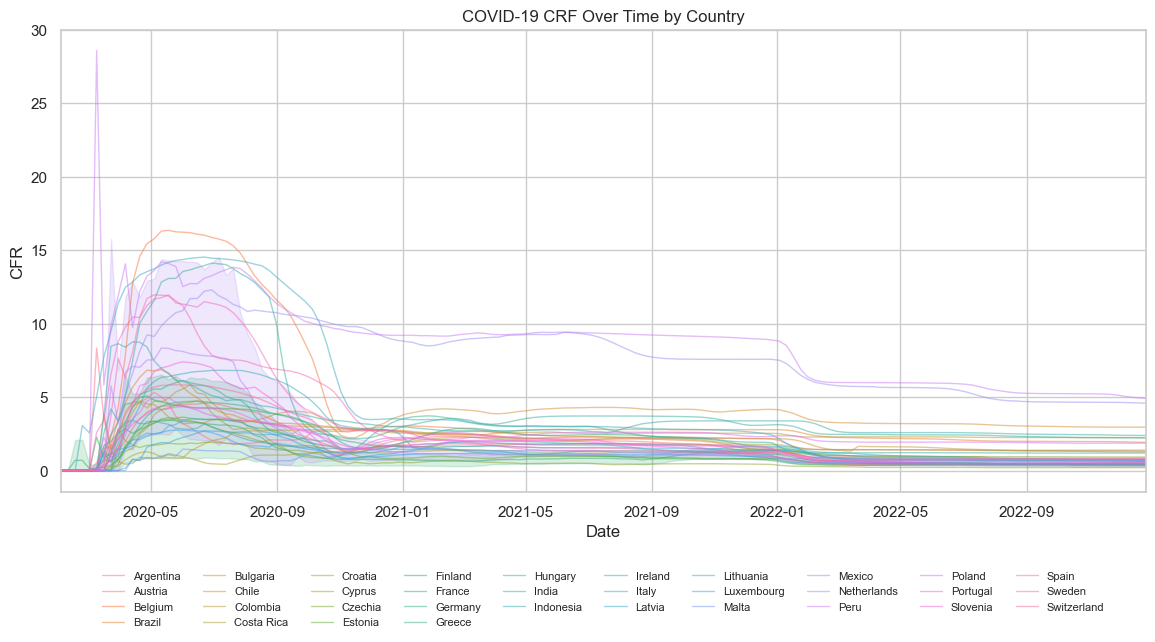

In [128]:
#the change of Confirmed by Date for each country
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.lineplot(data=merged_data, x="date", y="CFR", hue="Country Name", alpha=0.5, linewidth=1)

plt.xlim(merged_data["date"].min(), pd.to_datetime("2022-12-26"))
plt.title("COVID-19 CRF Over Time by Country")
plt.xlabel("Date")
plt.ylabel("CFR")
plt.legend(
    loc="upper center",         
    bbox_to_anchor=(0.5, -0.15),  
    ncol=10,                    
    fontsize=8,                  
    frameon=False                
) 

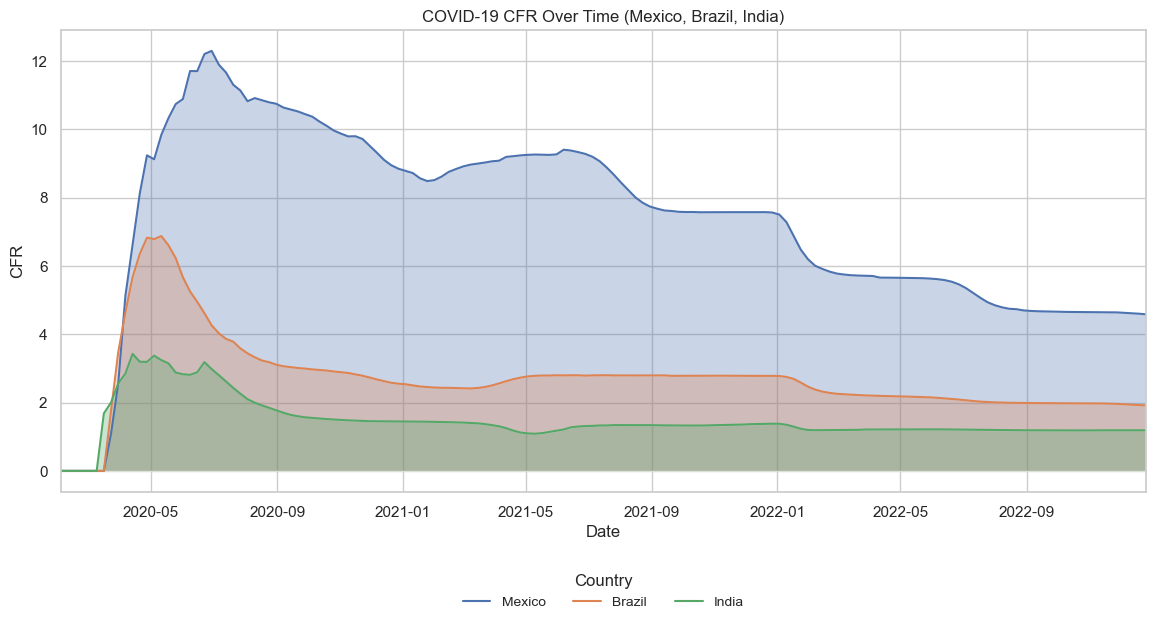

In [158]:


# 选择需要的国家
selected_countries = ["Mexico", "Brazil", "India"]

# 筛选数据
filtered_data = merged_data[merged_data["Country Name"].isin(selected_countries)]

# 设置样式
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# 遍历选定的国家，绘制面积图
for country in selected_countries:
    country_data = filtered_data[filtered_data["Country Name"] == country]
    
    # 画折线图
    sns.lineplot(
        data=country_data, 
        x="date", 
        y="CFR", 
        label=country, 
        linewidth=1.5
    )

    # 画面积填充图
    plt.fill_between(
        country_data["date"], 
        country_data["CFR"], 
        alpha=0.3
    )

# 设置X轴范围
plt.xlim(filtered_data["date"].min(), pd.to_datetime("2022-12-26"))

# 添加标题和标签
plt.title("COVID-19 CFR Over Time (Mexico, Brazil, India)")
plt.xlabel("Date")
plt.ylabel("CFR")

# 调整图例位置
plt.legend(
    title="Country",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    fontsize=10,
    frameon=False
)

# 显示图表
plt.show()


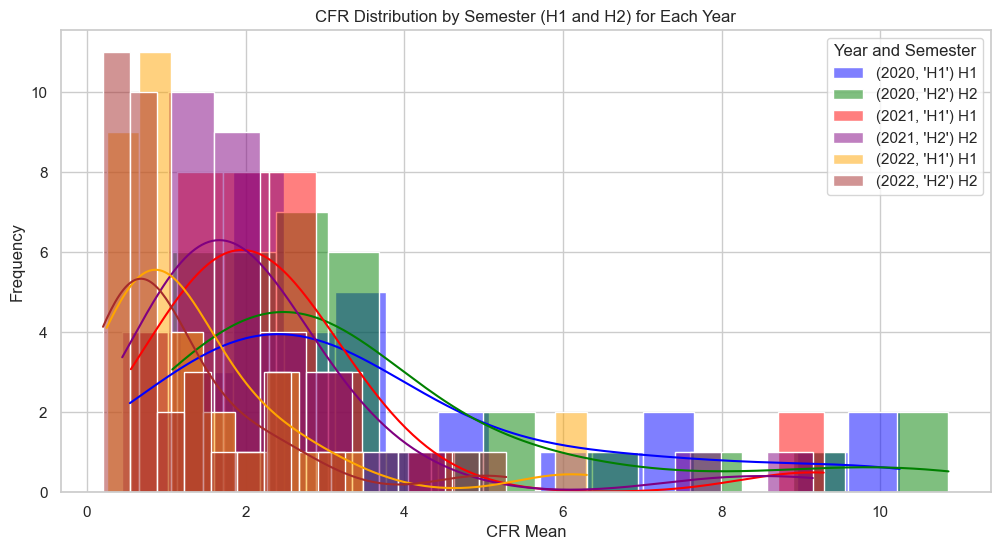

In [132]:

# 确保 "date" 列是 datetime 类型
merged_data["date"] = pd.to_datetime(merged_data["date"], errors='coerce')

# 提取年份和月份
merged_data['year'] = merged_data['date'].dt.year
merged_data['month'] = merged_data['date'].dt.month

# 创建一个新的列，标记每半年
merged_data['semester'] = merged_data['month'].apply(lambda x: 'H1' if x <= 6 else 'H2')

# 计算每个国家每半年 (H1 和 H2) 的 CRF 均值
semester_means = merged_data.groupby(['year', 'semester', 'Country Name'])['CFR'].mean().reset_index()

# 绘制图表
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# 定义颜色
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 为每个半年绘制均值分布
for i, (year, semester) in enumerate(semester_means.groupby(['year', 'semester'])):
    semester_data = semester['CFR']
    label = f"{year} {semester.iloc[0]['semester']}"  # 每年每半年标记
    sns.histplot(semester_data, kde=True, bins=15, color=colors[i % len(colors)], label=label, alpha=0.5)

# 添加标题和标签
plt.title("CFR Distribution by Semester (H1 and H2) for Each Year")
plt.xlabel("CFR Mean")
plt.ylabel("Frequency")

# 添加图例
plt.legend(title="Year and Semester")

# 显示图表
plt.show()


C:\Users\chenr\AppData\Local\Temp\ipykernel_6396\2912989470.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year_semester', y='Stringent Index', data=semester_means, palette="Set2")


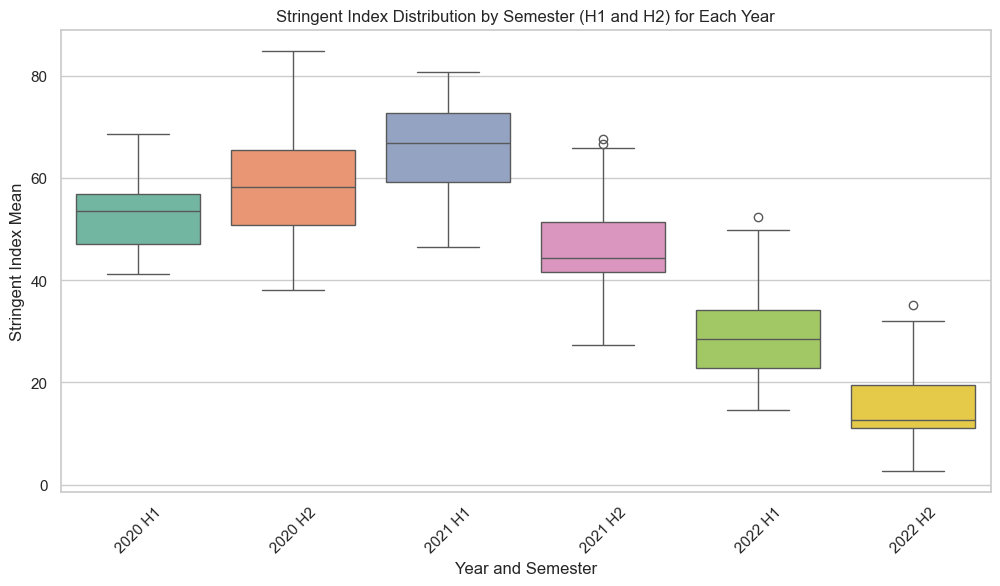

  Country Name       date  CRF  Stringent Index  Average Monthly wage  \
0    Argentina 2020-02-03  0.0            11.11               514.353   
1      Austria 2020-02-03  0.0             0.00              4753.406   
2      Belgium 2020-02-03  0.0            11.11              5760.266   
3       Brazil 2020-02-03  0.0             5.56               477.027   
4     Bulgaria 2020-02-03  0.0             2.78               855.426   

   Inefficient Employment  Unemployment Rate  Gini Index   Population  \
0                  46.981             11.461        42.7   45191965.0   
1                   1.978              5.201        29.8    8916864.0   
2                   1.262              5.545        26.0   11538604.0   
3                  36.730             13.697        48.9  208660842.0   
4                   2.726              5.125        40.5    6934015.0   

   Government Health Spending  year  month semester  
0                    1443.829  2020      2       H1  
1             

In [110]:
merged_data["date"] = pd.to_datetime(merged_data["date"], errors='coerce')

# 为了根据半年划分，首先提取年份和月份
merged_data['year'] = merged_data['date'].dt.year
merged_data['month'] = merged_data['date'].dt.month

# 创建一个新的列，标记每半年
merged_data['semester'] = merged_data['month'].apply(lambda x: 'H1' if x <= 6 else 'H2')

# 计算每个国家每半年 (H1 和 H2) 的 Stringent Index 均值
semester_means = merged_data.groupby(['year', 'semester', 'Country Name'])['Stringent Index'].mean().reset_index()

# 新增一个 'year_semester' 列，合并年和学期信息，方便分类绘制箱型图
semester_means['year_semester'] = semester_means['year'].astype(str) + " " + semester_means['semester']

# 绘制箱型图
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# 绘制每个学期的 Stringent Index 箱型图
sns.boxplot(x='year_semester', y='Stringent Index', data=semester_means, palette="Set2")

# 添加标题和标签
plt.title("Stringent Index Distribution by Semester (H1 and H2) for Each Year")
plt.xlabel("Year and Semester")
plt.ylabel("Stringent Index Mean")

# 显示图表
plt.xticks(rotation=45)  # 让 x 轴标签倾斜，使得更容易阅读
plt.show()
print(merged_data.head())

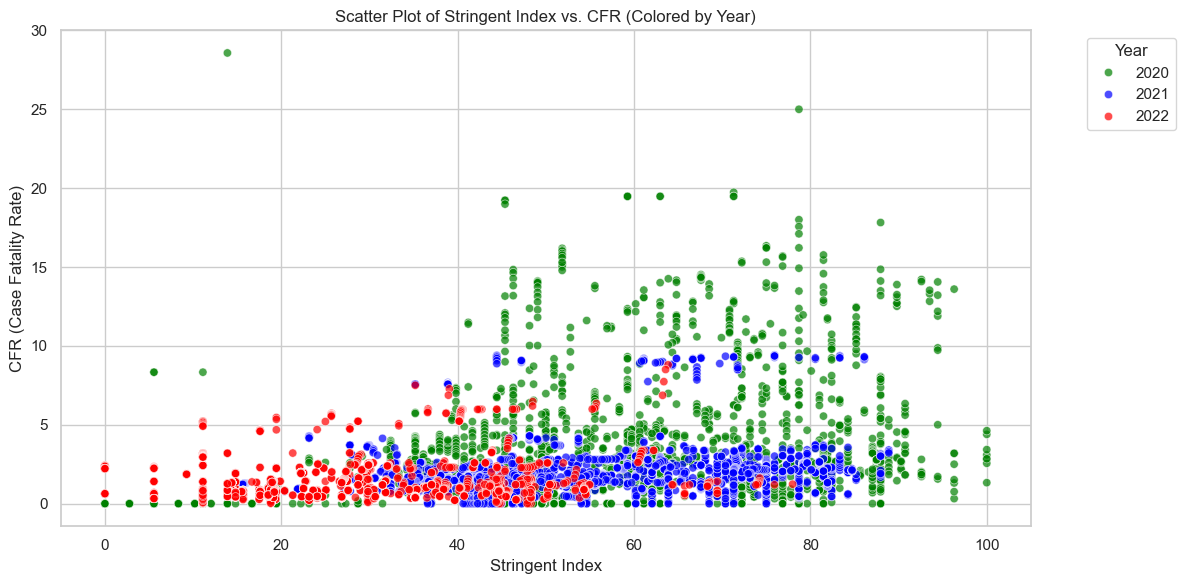

In [137]:
merged_data['year'] = merged_data['date'].dt.year

# 绘制散点图
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# 设置自定义颜色映射
color_map = {2020: 'green', 2021: 'blue', 2022: 'red'}

# 使用散点图，按年份上色
sns.scatterplot(x='Stringent Index', y='CFR', hue='year', data=merged_data, palette=color_map, alpha=0.7)

# 添加标题和标签
plt.title("Scatter Plot of Stringent Index vs. CFR (Colored by Year)")
plt.xlabel("Stringent Index")
plt.ylabel("CFR (Case Fatality Rate)")

# 添加图例
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图表
plt.tight_layout()
plt.show()


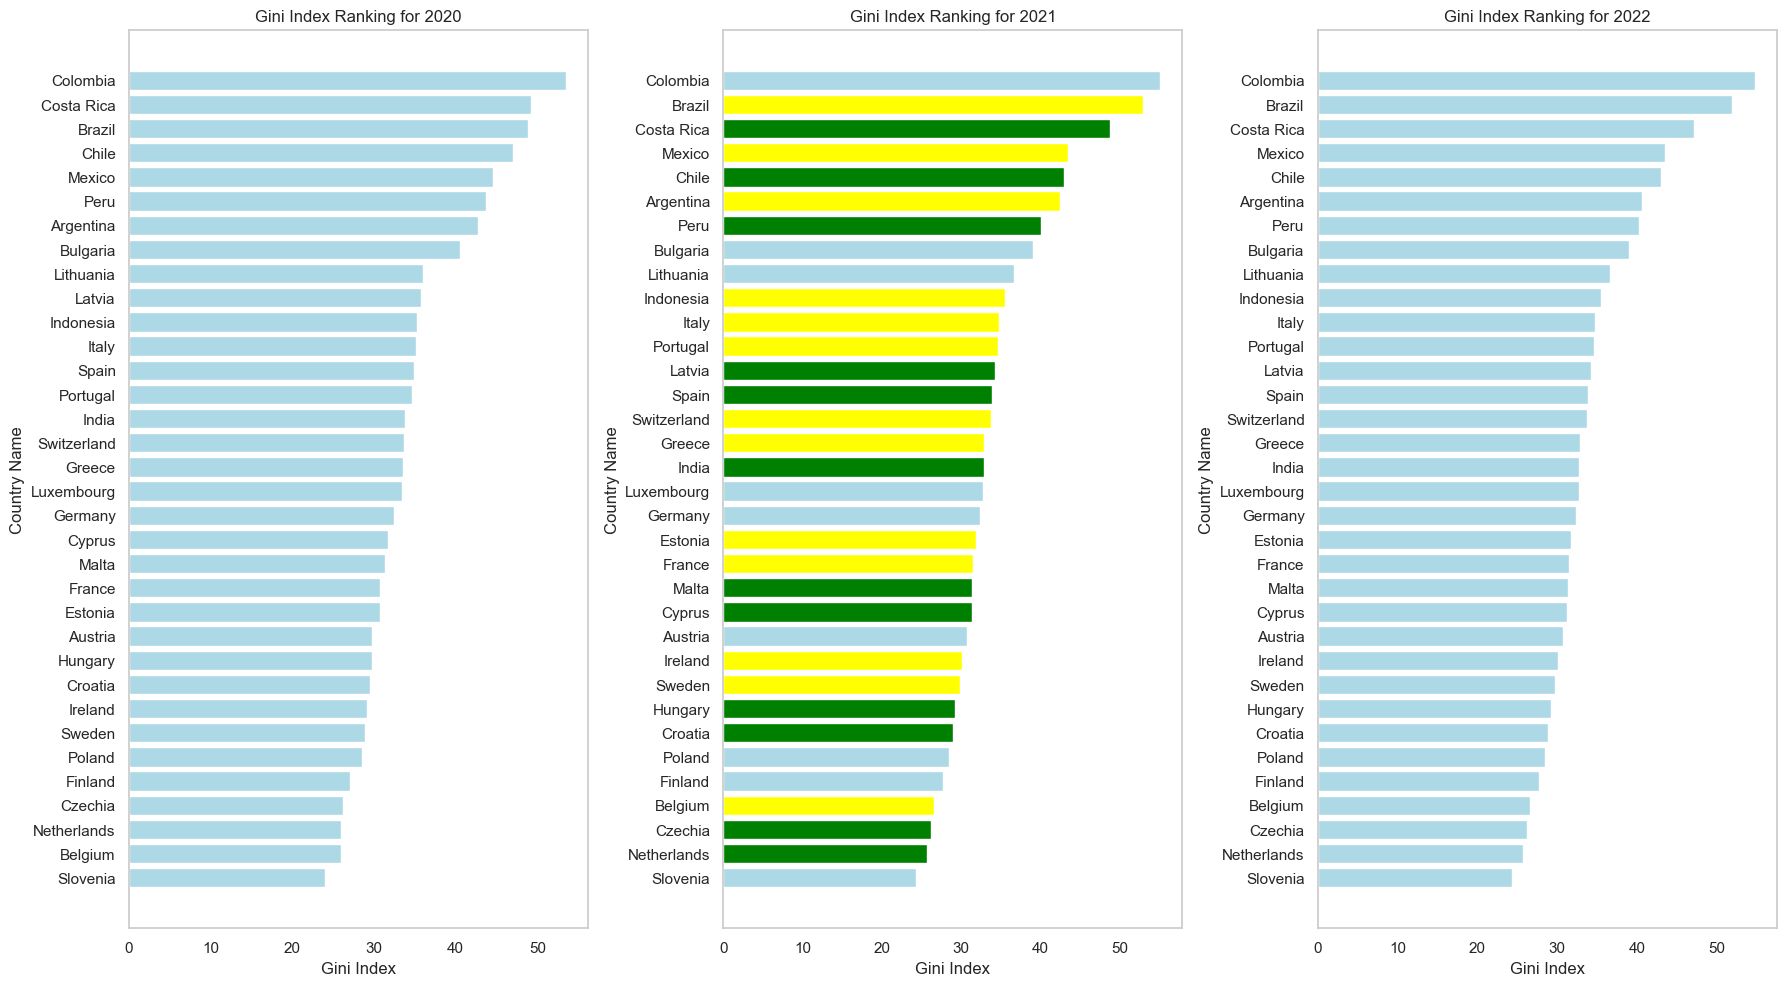

In [113]:
merged_data["date"] = pd.to_datetime(merged_data["date"], errors='coerce')

# 提取每年最后一次的数据
merged_data['Year'] = merged_data['date'].dt.year
last_data_per_year = merged_data.groupby(['Country Name', 'Year']).last().reset_index()

# 按 Gini Index 排序
last_data_per_year['Rank'] = last_data_per_year.groupby('Year')['Gini Index'].rank(method='min', ascending=False)

# 排名变化（例如，2022年相对于2021年）
gini_wide = last_data_per_year.pivot(index='Country Name', columns='Year', values='Rank')

# 计算排名变化
gini_wide['Rank Change 2'] = gini_wide[2022] - gini_wide[2021]
gini_wide['Rank Change 1'] = gini_wide[2021] - gini_wide[2020]

# 绘图
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# 获取年份列表
years = last_data_per_year['Year'].unique()

for i, year in enumerate(years):
    year_data = last_data_per_year[last_data_per_year['Year'] == year]

    # 按 Gini Index 排序
    year_data = year_data.sort_values(by='Gini Index', ascending=True)

    # 设置颜色
    if year == 2022:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'green' if gini_wide.loc[country, 'Rank Change 2'] > 0 else 
            ('yellow' if gini_wide.loc[country, 'Rank Change 2'] < 0 else 'lightblue')
        )
    elif year == 2021:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'green' if gini_wide.loc[country, 'Rank Change 1'] > 0 else 
            ('yellow' if gini_wide.loc[country, 'Rank Change 1'] < 0 else 'lightblue')
        )
    else:
        year_data['Color'] = 'lightblue'  # 其他年份默认颜色

    # 绘制条形图
    ax = plt.subplot(1, len(years), i + 1)
    for idx, row in year_data.iterrows():
        ax.barh(row['Country Name'], row['Gini Index'], color=row['Color'])

    ax.set_title(f"Gini Index Ranking for {year}")
    ax.set_xlabel("Gini Index")
    ax.set_ylabel("Country Name")
    ax.grid(False)  # 去掉网格线

plt.tight_layout(pad=1)
plt.show()

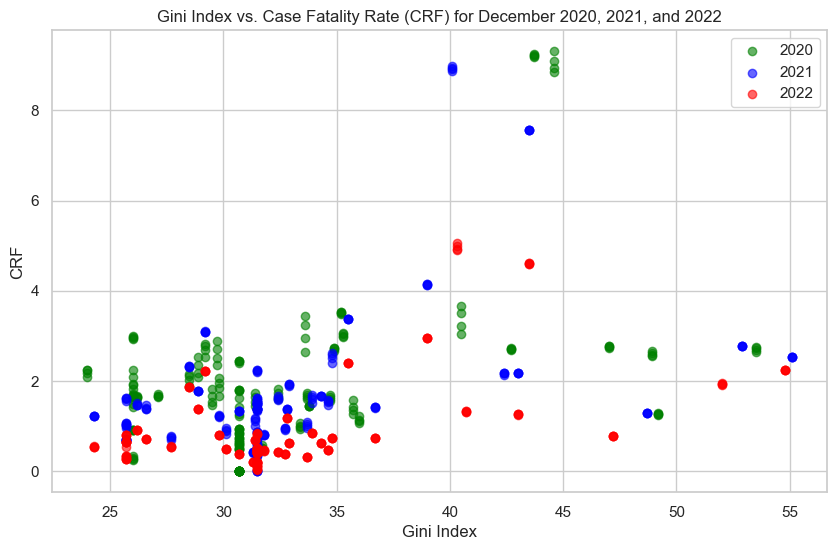

In [90]:
#peak death rate
import pandas as pd
import matplotlib.pyplot as plt

# 确保 'date' 列是 datetime 类型
merged_data['date'] = pd.to_datetime(merged_data['date'])

# 筛选出每年12月的数据
december_data = merged_data[merged_data['date'].dt.month == 12]

# 绘制每年12月的数据，颜色根据年份标记
plt.figure(figsize=(10, 6))

# 2020年12月的散点图（用绿色）
plt.scatter(december_data[december_data['date'].dt.year == 2020]['Gini Index'],
            december_data[december_data['date'].dt.year == 2020]['CRF'],
            alpha=0.6, label='2020', color='green')

# 2021年12月的散点图（用蓝色）
plt.scatter(december_data[december_data['date'].dt.year == 2021]['Gini Index'],
            december_data[december_data['date'].dt.year == 2021]['CRF'],
            alpha=0.6, label='2021', color='blue')

# 2022年12月的散点图（用红色）
plt.scatter(december_data[december_data['date'].dt.year == 2022]['Gini Index'],
            december_data[december_data['date'].dt.year == 2022]['CRF'],
            alpha=0.6, label='2022', color='red')

# 设置标题和轴标签
plt.title('Gini Index vs. Case Fatality Rate (CRF) for December 2020, 2021, and 2022')
plt.xlabel('Gini Index')
plt.ylabel('CRF')

# 添加图例
plt.legend()

# 显示图形
plt.show()


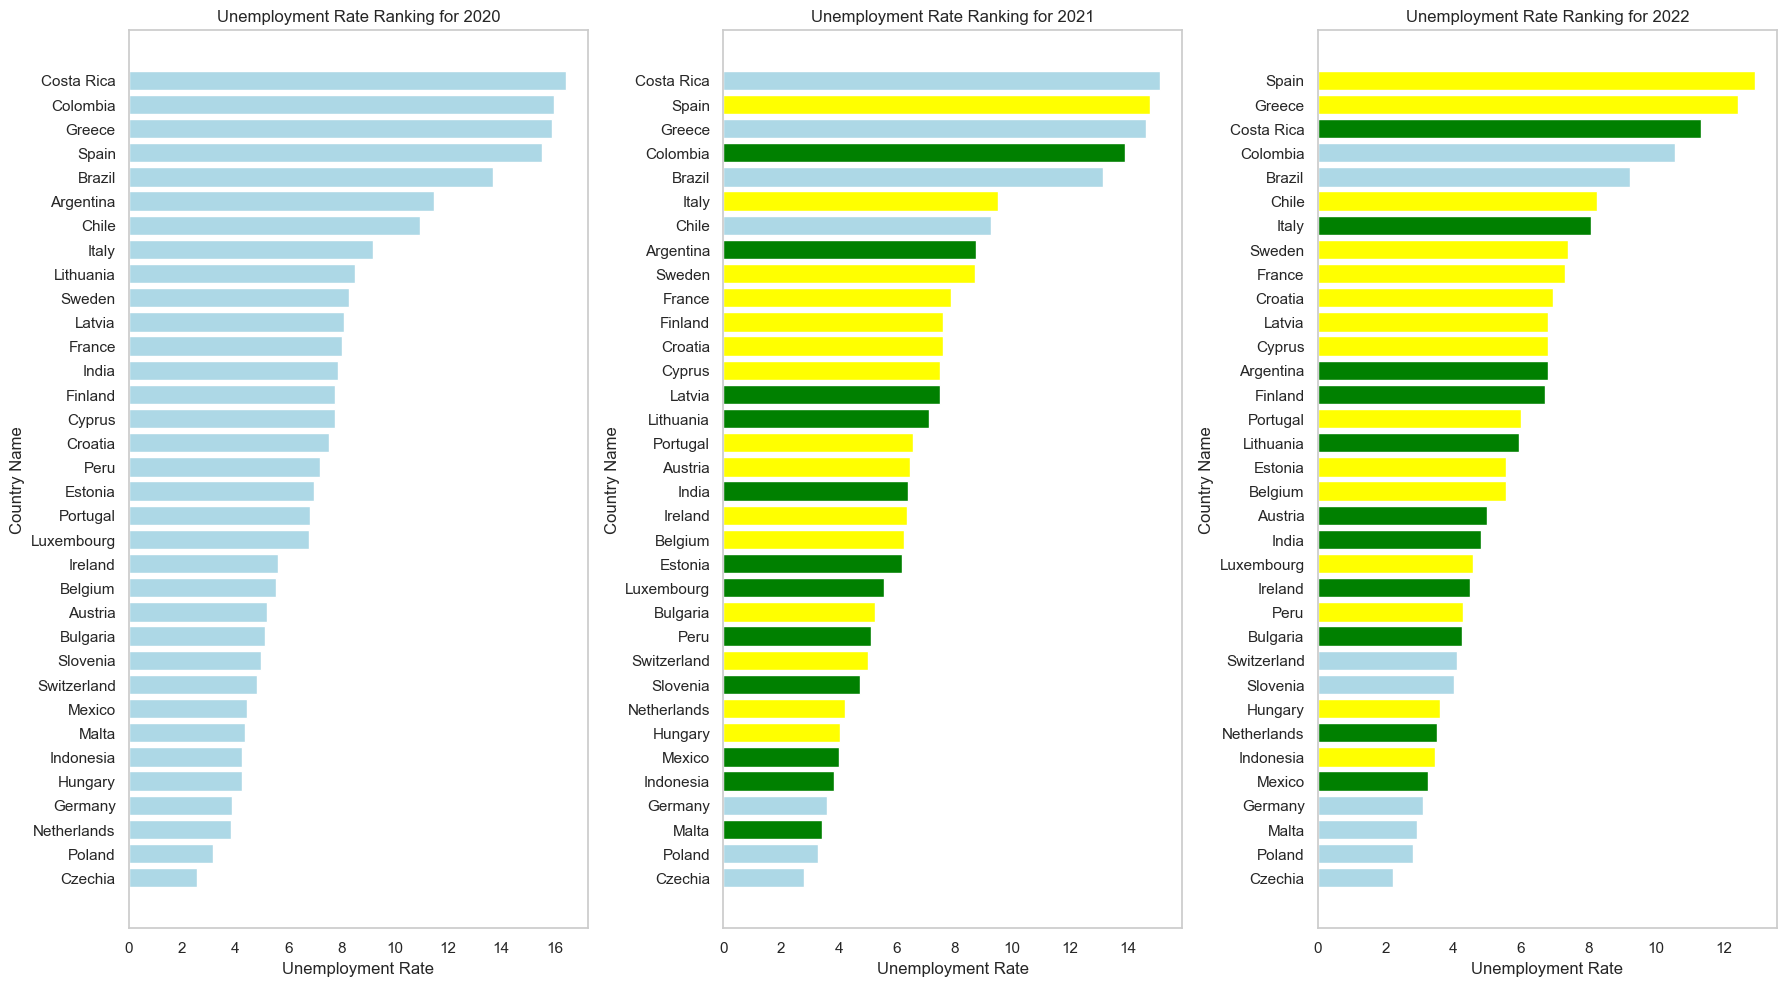

In [117]:
last_data_per_year['Rank'] = last_data_per_year.groupby('Year')['Unemployment Rate'].rank(method='min', ascending=False)

# 排名变化（例如，2022年相对于2021年）
unemployment_wide = last_data_per_year.pivot(index='Country Name', columns='Year', values='Rank')

# 计算排名变化
unemployment_wide['Rank Change 2'] = unemployment_wide[2022] - unemployment_wide[2021]
unemployment_wide['Rank Change 1'] = unemployment_wide[2021] - unemployment_wide[2020]

# 绘图
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# 获取年份列表
years = last_data_per_year['Year'].unique()

for i, year in enumerate(years):
    year_data = last_data_per_year[last_data_per_year['Year'] == year]

    # 按 Unemployment Rate 排序
    year_data = year_data.sort_values(by='Unemployment Rate', ascending=True)

    # 设置颜色
    if year == 2022:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'green' if unemployment_wide.loc[country, 'Rank Change 2'] > 0 else 
            ('yellow' if unemployment_wide.loc[country, 'Rank Change 2'] < 0 else 'lightblue')
        )
    elif year == 2021:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'green' if unemployment_wide.loc[country, 'Rank Change 1'] > 0 else 
            ('yellow' if unemployment_wide.loc[country, 'Rank Change 1'] < 0 else 'lightblue')
        )
    else:
        year_data['Color'] = 'lightblue'  # 其他年份默认颜色

    # 绘制条形图
    ax = plt.subplot(1, len(years), i + 1)
    for idx, row in year_data.iterrows():
        ax.barh(row['Country Name'], row['Unemployment Rate'], color=row['Color'])

    ax.set_title(f"Unemployment Rate Ranking for {year}")
    ax.set_xlabel("Unemployment Rate")
    ax.set_ylabel("Country Name")
    ax.grid(False)  # 去掉网格线

plt.tight_layout(pad=1)
plt.show()

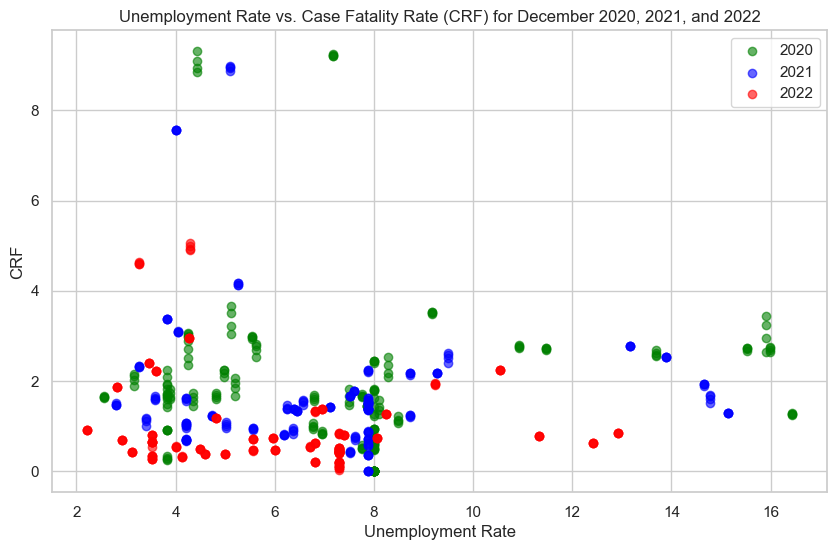

In [89]:
# 确保 'date' 列是 datetime 类型
merged_data['date'] = pd.to_datetime(merged_data['date'])

# 筛选出每年12月的数据
december_data = merged_data[merged_data['date'].dt.month == 12]

# 绘制每年12月的数据，颜色根据年份标记
plt.figure(figsize=(10, 6))

# 2020年12月的散点图（用绿色）
plt.scatter(december_data[december_data['date'].dt.year == 2020]['Unemployment Rate'],
            december_data[december_data['date'].dt.year == 2020]['CRF'],
            alpha=0.6, label='2020', color='green')

# 2021年12月的散点图（用蓝色）
plt.scatter(december_data[december_data['date'].dt.year == 2021]['Unemployment Rate'],
            december_data[december_data['date'].dt.year == 2021]['CRF'],
            alpha=0.6, label='2021', color='blue')

# 2022年12月的散点图（用红色）
plt.scatter(december_data[december_data['date'].dt.year == 2022]['Unemployment Rate'],
            december_data[december_data['date'].dt.year == 2022]['CRF'],
            alpha=0.6, label='2022', color='red')

# 设置标题和轴标签
plt.title('Unemployment Rate vs. Case Fatality Rate (CRF) for December 2020, 2021, and 2022')
plt.xlabel('Unemployment Rate')
plt.ylabel('CRF')

# 添加图例
plt.legend()

# 显示图形
plt.show()


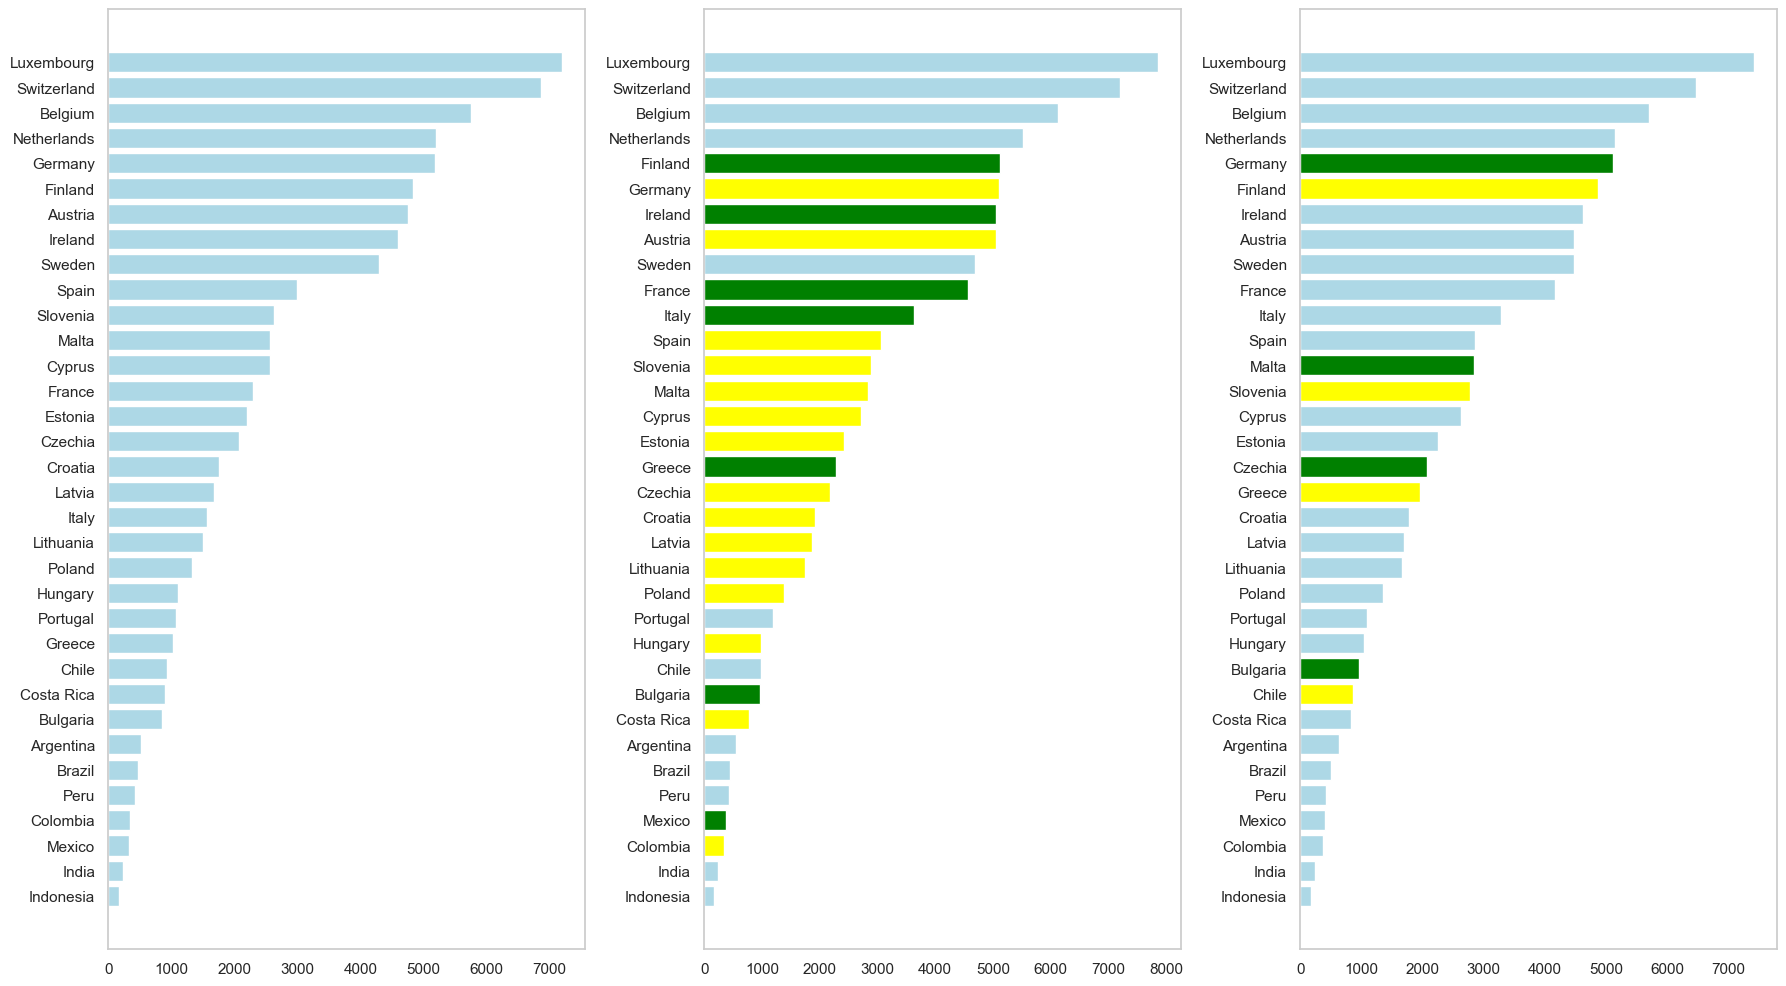

In [162]:
last_data_per_year['Rank'] = last_data_per_year.groupby('Year')['Average Monthly wage'].rank(method='min', ascending=False)

# 排名变化（例如，2022年相对于2021年）
wage_wide = last_data_per_year.pivot(index='Country Name', columns='Year', values='Rank')

# 计算排名变化
wage_wide['Rank Change 2'] = wage_wide[2022] - wage_wide[2021]
wage_wide['Rank Change 1'] = wage_wide[2021] - wage_wide[2020]

# 绘图
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# 获取年份列表
years = last_data_per_year['Year'].unique()

for i, year in enumerate(years):
    year_data = last_data_per_year[last_data_per_year['Year'] == year]

    # 按 Average Monthly wage 排序
    year_data = year_data.sort_values(by='Average Monthly wage', ascending=True)

    # 设置颜色
    if year == 2022:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'yellow' if wage_wide.loc[country, 'Rank Change 2'] > 0 else 
            ('green' if wage_wide.loc[country, 'Rank Change 2'] < 0 else 'lightblue')
        )
    elif year == 2021:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'yellow' if wage_wide.loc[country, 'Rank Change 1'] > 0 else 
            ('green' if wage_wide.loc[country, 'Rank Change 1'] < 0 else 'lightblue')
        )
    else:
        year_data['Color'] = 'lightblue'  # 其他年份默认颜色

    # 绘制条形图
    ax = plt.subplot(1, len(years), i + 1)
    ax.grid(False)
    for idx, row in year_data.iterrows():
        ax.barh(row['Country Name'], row['Average Monthly wage'], color=row['Color'])
plt.tight_layout(pad=1)

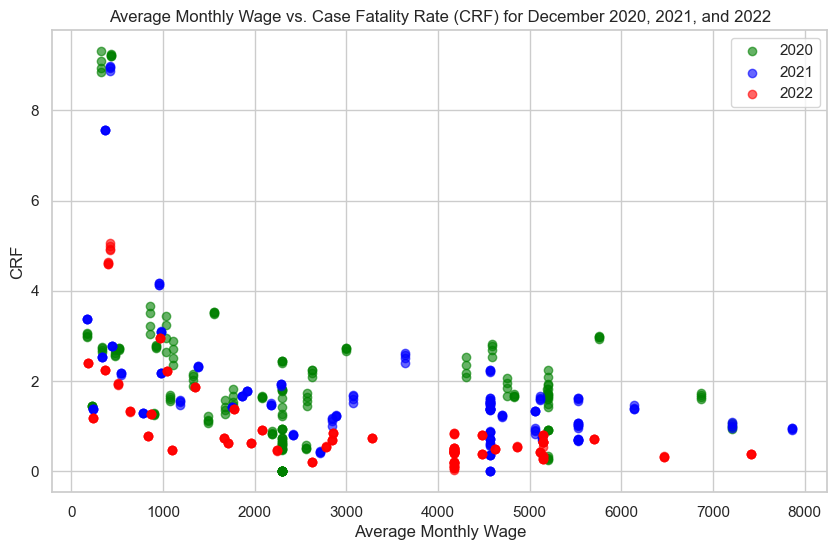

In [88]:
merged_data['date'] = pd.to_datetime(merged_data['date'])

# 筛选出每年12月的数据
december_data = merged_data[merged_data['date'].dt.month == 12]

# 绘制每年12月的散点图，颜色根据年份标记
plt.figure(figsize=(10, 6))

# 2020年12月的散点图（用绿色）
plt.scatter(december_data[december_data['date'].dt.year == 2020]['Average Monthly wage'],
            december_data[december_data['date'].dt.year == 2020]['CRF'],
            alpha=0.6, label='2020', color='green')

# 2021年12月的散点图（用蓝色）
plt.scatter(december_data[december_data['date'].dt.year == 2021]['Average Monthly wage'],
            december_data[december_data['date'].dt.year == 2021]['CRF'],
            alpha=0.6, label='2021', color='blue')

# 2022年12月的散点图（用红色）
plt.scatter(december_data[december_data['date'].dt.year == 2022]['Average Monthly wage'],
            december_data[december_data['date'].dt.year == 2022]['CRF'],
            alpha=0.6, label='2022', color='red')

# 设置标题和轴标签
plt.title('Average Monthly Wage vs. Case Fatality Rate (CRF) for December 2020, 2021, and 2022')
plt.xlabel('Average Monthly Wage')
plt.ylabel('CRF')

# 添加图例
plt.legend()

# 显示图形
plt.show()

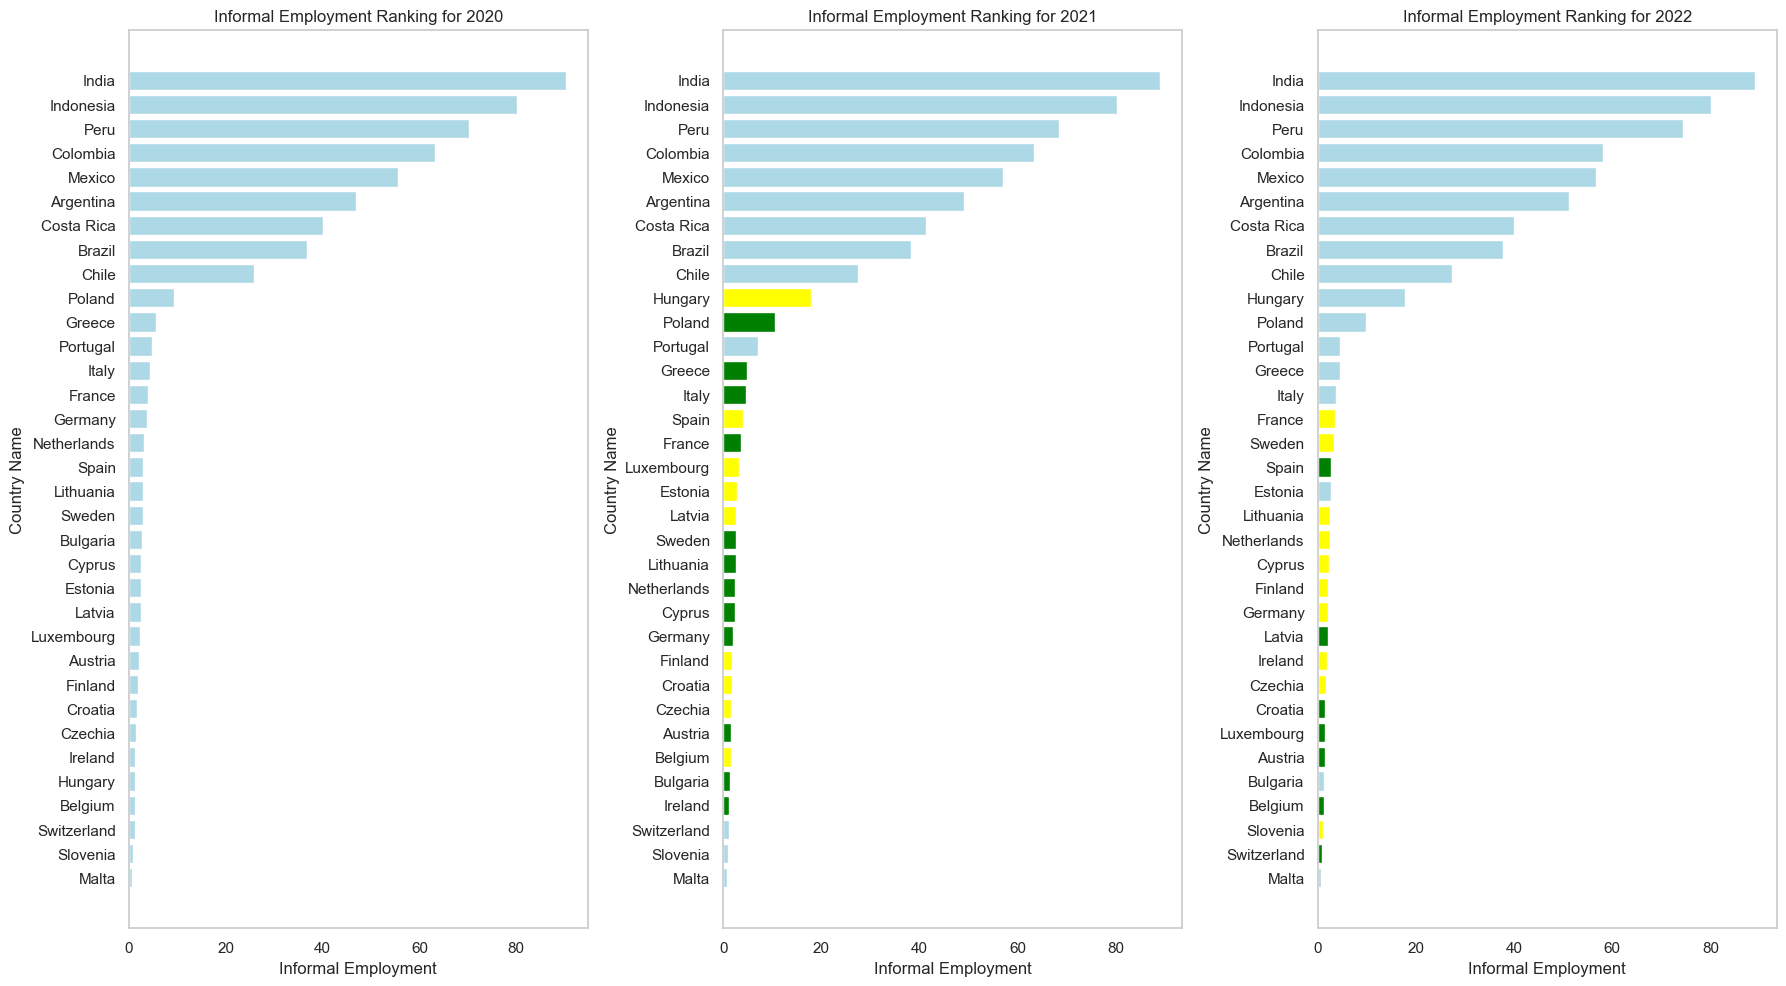

In [121]:
last_data_per_year['Rank'] = last_data_per_year.groupby('Year')['Inefficient Employment'].rank(method='min', ascending=False)

# 排名变化（例如，2022年相对于2021年）
informal_employment_wide = last_data_per_year.pivot(index='Country Name', columns='Year', values='Rank')

# 计算排名变化
informal_employment_wide['Rank Change 2'] = informal_employment_wide[2022] - informal_employment_wide[2021]
informal_employment_wide['Rank Change 1'] = informal_employment_wide[2021] - informal_employment_wide[2020]

# 绘图
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")

# 获取年份列表
years = last_data_per_year['Year'].unique()

for i, year in enumerate(years):
    year_data = last_data_per_year[last_data_per_year['Year'] == year]

    # 按 Informal Employment 排序
    year_data = year_data.sort_values(by='Inefficient Employment', ascending=True)

    # 设置颜色
    if year == 2022:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'green' if informal_employment_wide.loc[country, 'Rank Change 2'] > 0 else 
            ('yellow' if informal_employment_wide.loc[country, 'Rank Change 2'] < 0 else 'lightblue')
        )
    elif year == 2021:
        year_data['Color'] = year_data['Country Name'].apply(
            lambda country: 'green' if informal_employment_wide.loc[country, 'Rank Change 1'] > 0 else 
            ('yellow' if informal_employment_wide.loc[country, 'Rank Change 1'] < 0 else 'lightblue')
        )
    else:
        year_data['Color'] = 'lightblue'  # 其他年份默认颜色

    # 绘制条形图
    ax = plt.subplot(1, len(years), i + 1)
    for idx, row in year_data.iterrows():
        ax.barh(row['Country Name'], row['Inefficient Employment'], color=row['Color'])

    ax.set_title(f"Informal Employment Ranking for {year}")
    ax.set_xlabel("Informal Employment")
    ax.set_ylabel("Country Name")
    ax.grid(False)  # 去掉网格线

plt.tight_layout(pad=1)
plt.show()

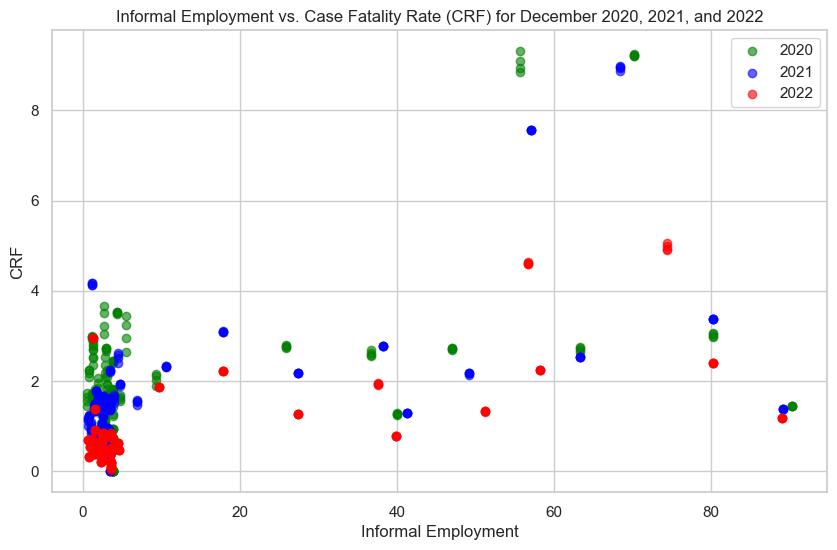

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# 确保 'date' 列是 datetime 类型
merged_data['date'] = pd.to_datetime(merged_data['date'])

# 筛选出每年12月的数据
december_data = merged_data[merged_data['date'].dt.month == 12]

# 绘制每年12月的数据，颜色根据年份标记
plt.figure(figsize=(10, 6))

# 2020年12月的散点图（用绿色）
plt.scatter(december_data[december_data['date'].dt.year == 2020]['Inefficient Employment'],
            december_data[december_data['date'].dt.year == 2020]['CRF'],
            alpha=0.6, label='2020', color='green')

# 2021年12月的散点图（用蓝色）
plt.scatter(december_data[december_data['date'].dt.year == 2021]['Inefficient Employment'],
            december_data[december_data['date'].dt.year == 2021]['CRF'],
            alpha=0.6, label='2021', color='blue')

# 2022年12月的散点图（用红色）
plt.scatter(december_data[december_data['date'].dt.year == 2022]['Inefficient Employment'],
            december_data[december_data['date'].dt.year == 2022]['CRF'],
            alpha=0.6, label='2022', color='red')

# 设置标题和轴标签
plt.title('Informal Employment vs. Case Fatality Rate (CRF) for December 2020, 2021, and 2022')
plt.xlabel('Informal Employment')
plt.ylabel('CRF')

# 添加图例
plt.legend()

# 显示图形
plt.show()


C:\Users\chenr\AppData\Local\Temp\ipykernel_6396\80033280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\chenr\AppData\Local\Temp\ipykernel_6396\80033280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\chenr\AppData\Local\Temp\ipykernel_6396\80033280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\chenr\AppData\Local\Temp\ipykernel_6396\80033280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set 

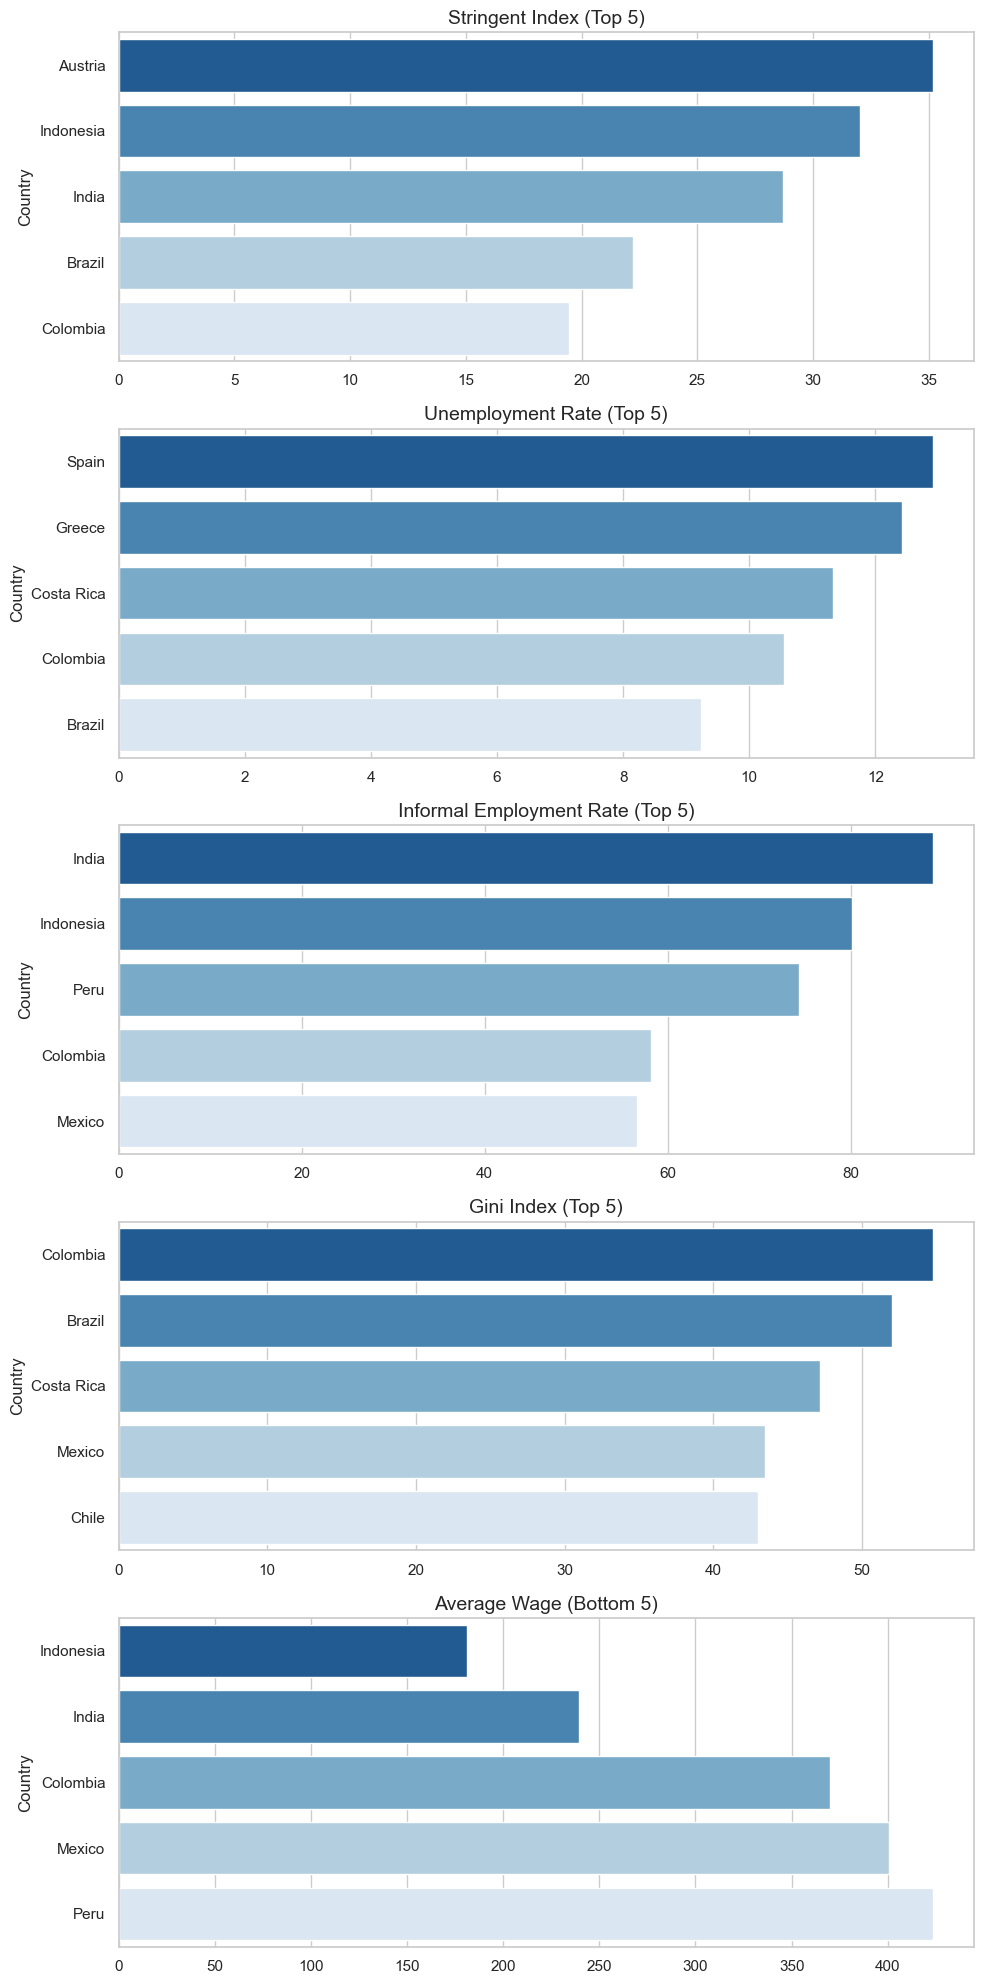

In [161]:

# 过滤出 2022 年最后出现的数据
latest_2022 = merged_data[merged_data['date'].dt.year == 2022].groupby('Country Name').last().reset_index()

# 指定每个指标的前 5 名或后 5 名
metrics = {
    "Stringent Index (Top 5)": latest_2022.nlargest(5, "Stringent Index")[["Country Name", "Stringent Index"]],
    "Unemployment Rate (Top 5)": latest_2022.nlargest(5, "Unemployment Rate")[["Country Name", "Unemployment Rate"]],
    "Informal Employment Rate (Top 5)": latest_2022.nlargest(5, "Inefficient Employment")[["Country Name", "Inefficient Employment"]],
    "Gini Index (Top 5)": latest_2022.nlargest(5, "Gini Index")[["Country Name", "Gini Index"]],
    "Average Wage (Bottom 5)": latest_2022.nsmallest(5, "Average Monthly wage")[["Country Name", "Average Monthly wage"]]
}

# 设置画布大小
plt.figure(figsize=(10, 20))

# 遍历每个指标并绘制单独的条形图
for i, (title, df) in enumerate(metrics.items(), 1):
    plt.subplot(5, 1, i)  # 5 行 1 列，每个指标占据一行
    sns.barplot(
        data=df,
        x=df.columns[1],  # 取对应指标的数值列
        y="Country Name",
        palette="Blues_r"
    )
    plt.title(title, fontsize=14)
    plt.xlabel("")
    plt.ylabel("Country")

# 调整布局
plt.tight_layout()
plt.show()


<h2> Conclusion </h2>

<h2> Citations </h2>

[1] Tan, A. X., Hinman, J. A., Abdel Magid, H. S., Nelson, L. M., & Odden, M. C. (2021). Association Between Income Inequality and County-Level COVID-19 Cases and Deaths in the US. JAMA Network Open, 4(5), e218799. https://doi.org/10.1001/jamanetworkopen.2021.8799

[2] Sepulveda, E. R., & Brooker, A. S. (2021). Income inequality and COVID-19 mortality: Age-stratified analysis of 22 OECD countries. SSM - population health, 16, 100904. https://doi.org/10.1016/j.ssmph.2021.100904

[3] Rahman, R., Kang, J., Rousseau, J. F., & Ding, Y. (2023). Analyzing Impact of Socio-Economic Factors on COVID-19 Mortality Prediction Using SHAP Value. ArXiv.org. https://arxiv.org/abs/2303.00517?utm_source=chatgpt.com

[4] Motallebi, S., Cheung, R. C. Y., Mohit, B., Shahabi, S., Tabriz, A. A., Sadeghi, B., & Moattari, S. (2021). Modeling COVID-19 Mortality Across 44 Countries: Face Covering May Reduce Deaths. American Journal of Preventive Medicine. https://doi.org/10.1016/j.amepre.2021.09.019

[5] Kim, S. Y., Yoo, D. M., Min, C., & Choi, H. G. (2021). The Effects of Income Level on Susceptibility to COVID-19 and COVID-19 Morbidity/Mortality: A Nationwide Cohort Study in South Korea. Journal of Clinical Medicine, 10(20), 4733. https://doi.org/10.3390/jcm10204733
